# Ayundantia Data Science G31 - Fundamentos Data Science
- Autor: Alvaro Fuentes
- Fecha: 21/08/2021

In [2]:
# Librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Gráficos

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [191]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [192]:
# rename, nombre columnas
# str.replace cambiar caracter
df.rename(columns={'race/ethnicity' : 'race', 'parental level of education':'par_level_ed', 'test preparation course':'test_prep_course'}, inplace=True)
df.columns = df.columns.str.replace(' ', '_')

In [193]:
df.columns

Index(['gender', 'race', 'par_level_ed', 'lunch', 'test_prep_course',
       'math_score', 'reading_score', 'writing_score'],
      dtype='object')

In [194]:
df.isnull().sum()

gender              0
race                0
par_level_ed        0
lunch               0
test_prep_course    0
math_score          0
reading_score       0
writing_score       0
dtype: int64

In [195]:
df.dtypes

gender              object
race                object
par_level_ed        object
lunch               object
test_prep_course    object
math_score           int64
reading_score        int64
writing_score        int64
dtype: object

In [196]:
for i, j in df.iteritems():
    if df[i].dtypes == 'int64':
        print('****************')
        print(df[i].describe())
        
    else:
        print('****************')
        print(df[i].value_counts())
   

****************
female    518
male      482
Name: gender, dtype: int64
****************
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race, dtype: int64
****************
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: par_level_ed, dtype: int64
****************
standard        645
free/reduced    355
Name: lunch, dtype: int64
****************
none         642
completed    358
Name: test_prep_course, dtype: int64
****************
count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math_score, dtype: float64
****************
count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading_score, dtype: float64
***

In [197]:
df2 = pd.read_csv('retailMarketingDI.csv')
df2.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755.0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318.0
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296.0
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436.0
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304.0


In [198]:
df2.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      6
dtype: int64

In [199]:
df2.shape

(1000, 10)

In [200]:
tmp = df2.copy()

In [201]:
tmp.dropna(inplace=True)

In [202]:
tmp.shape

(694, 10)

In [203]:
tmp['Married'].value_counts()

Married    368
Single     326
Name: Married, dtype: int64

In [204]:
tmp['married_bin'] = np.where(tmp['Married'] == 'Single', 1, 0)

In [205]:
tmp.corr()

,Salary,Children,Catalogs,AmountSpent,married_bin
Salary,1.000000,0.056820,0.230286,0.664713,-0.654379
Children,0.056820,1.000000,-0.126526,-0.320692,-0.028435
Catalogs,0.230286,-0.126526,1.000000,0.511733,-0.148364
AmountSpent,0.664713,-0.320692,0.511733,1.000000,-0.441006
married_bin,-0.654379,-0.028435,-0.148364,-0.441006,1.000000


<AxesSubplot:xlabel='Salary'>

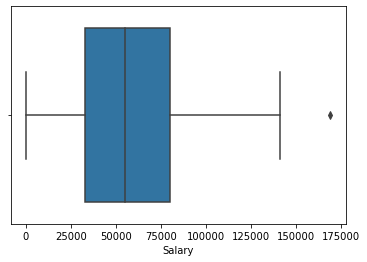

In [206]:
sns.boxplot(x='Salary', data=tmp)

In [207]:
tmp[tmp['Salary'] >= 140000]

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,married_bin
169,Middle,Male,Own,Married,Far,140000,0,High,12,4894.0,0
534,Middle,Male,Own,Married,Close,140700,3,Medium,12,1001.0,0
928,Old,Male,Own,Married,Close,168800,0,High,6,1512.0,0


In [254]:
tmp.shape

(694, 11)

### Matplotlib

a) Histogramas

(array([  1.,   1.,   3.,   3.,   4.,  10.,  21.,  34.,  47.,  79.,  78.,
         83., 124.,  99., 134.,  91.,  79.,  41.,  42.,  26.]),
 array([ 10. ,  14.5,  19. ,  23.5,  28. ,  32.5,  37. ,  41.5,  46. ,
         50.5,  55. ,  59.5,  64. ,  68.5,  73. ,  77.5,  82. ,  86.5,
         91. ,  95.5, 100. ]),
 <BarContainer object of 20 artists>)

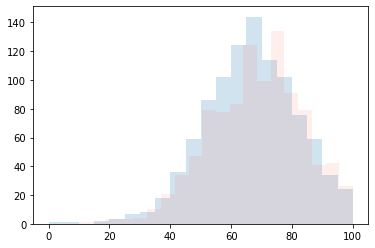

In [235]:
# creamos un simple histograma
plt.hist(df['math_score'], bins=20, alpha=.2)
plt.hist(df['writing_score'], bins=20, color='tomato', alpha=.1)

(array([  1.,   1.,   3.,   3.,   4.,  10.,  21.,  34.,  47.,  79.,  78.,
         83., 124.,  99., 134.,  91.,  79.,  41.,  42.,  26.]),
 array([ 10. ,  14.5,  19. ,  23.5,  28. ,  32.5,  37. ,  41.5,  46. ,
         50.5,  55. ,  59.5,  64. ,  68.5,  73. ,  77.5,  82. ,  86.5,
         91. ,  95.5, 100. ]),
 <BarContainer object of 20 artists>)

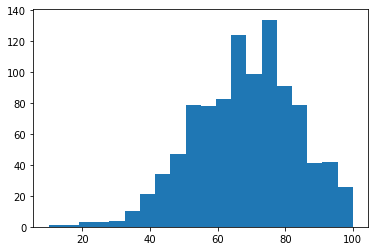

In [216]:
df.shape

(1000, 8)

In [217]:
df.head()

,gender,race,par_level_ed,lunch,test_prep_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Subplots

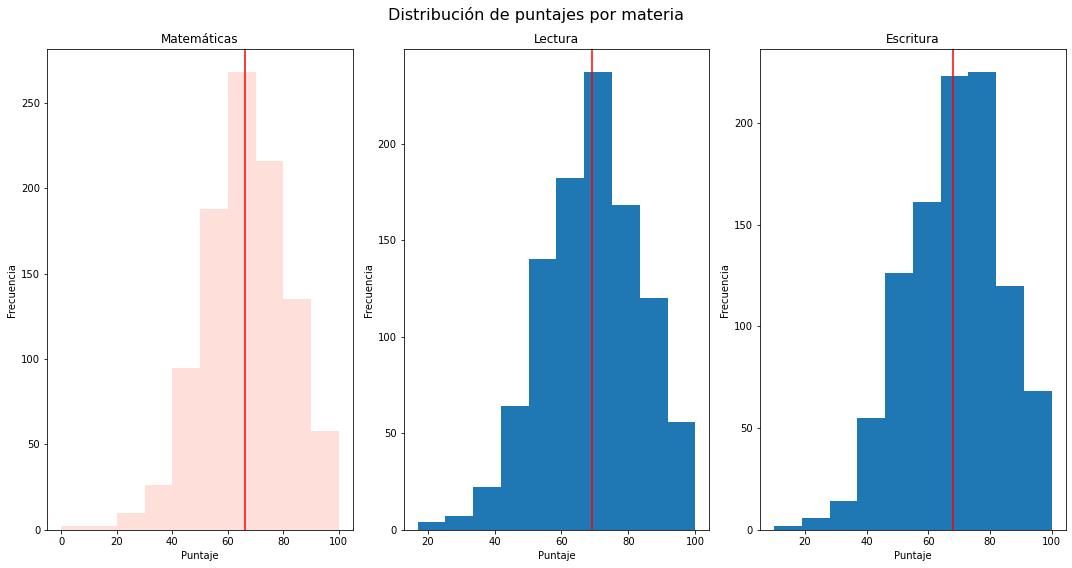

In [242]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
axes[0].hist(df['math_score'], color='tomato', alpha=.2)
axes[0].axvline(np.mean(df['math_score']), color='red')
axes[0].set_title('Matemáticas')
axes[0].set_xlabel('Puntaje')
axes[0].set_ylabel('Frecuencia')
axes[1].hist(df['reading_score'])
axes[1].axvline(np.mean(df['reading_score']), color='red')
axes[1].set_title('Lectura')
axes[1].set_xlabel('Puntaje')
axes[1].set_ylabel('Frecuencia')
axes[2].hist(df['writing_score'])
axes[2].axvline(np.mean(df['writing_score']), color='red')
axes[2].set_title('Escritura')
axes[2].set_xlabel('Puntaje')
axes[2].set_ylabel('Frecuencia')
fig.suptitle('Distribución de puntajes por materia', fontsize=16)
plt.tight_layout()
plt.show()
# ¿Como graficariamos la media para cada gráfico?

#### Seaborn

b) Countplot

In [67]:
df.dtypes

gender              object
race                object
par_level_ed        object
lunch               object
test_prep_course    object
math_score           int64
reading_score        int64
writing_score        int64
dtype: object

In [250]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

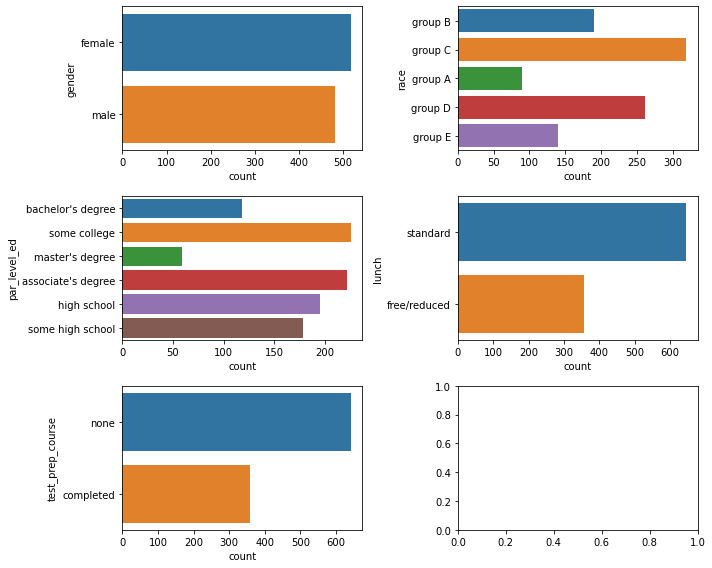

In [249]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
#for i, col in enumerate(df.columns):
for col, ax in zip(df.columns, axes.flatten()):
    if df[col].dtypes == 'object':
        sns.countplot(y=col, data=df, orient='v', ax=ax)  
plt.tight_layout()
plt.show()

b) Barplot

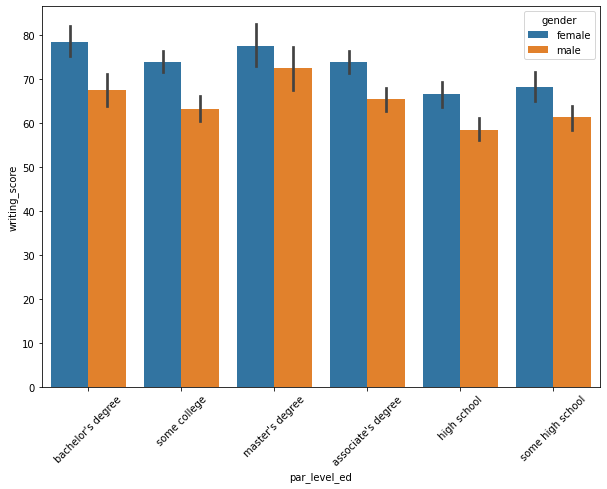

In [85]:
plt.figure(figsize=(10,7))
sns.barplot(x = "par_level_ed", y = "writing_score", hue = "gender", data = df)
plt.xticks(rotation=45)
plt.show()

c) Pie

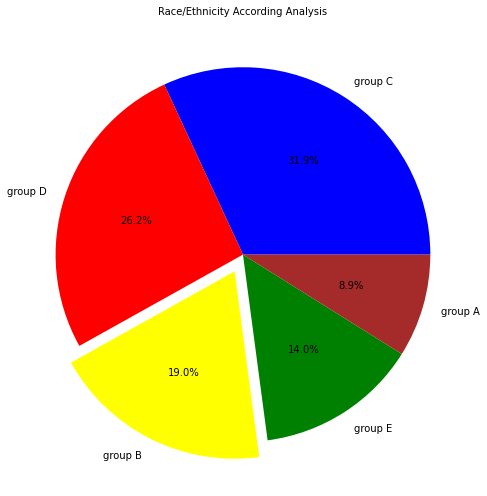

In [251]:
labels=df['race'].value_counts().index
colors=['blue','red','yellow','green','brown']
explode=[0,0,0.1,0,0]
values=df['race'].value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Race/Ethnicity According Analysis',color='black',fontsize=10)
plt.tight_layout()
plt.show()

d) lmplot

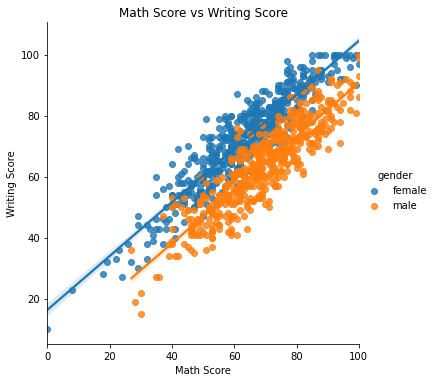

In [253]:
sns.lmplot(x='math_score',y='writing_score',data=df, hue='gender')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Math Score vs Writing Score')
plt.show()

### d.1. Correlación

La correlación lineal y la regresión lineal simple son métodos estadísticos que estudian la relación lineal existente entre dos variables. Antes de profundizar en cada uno de ellos, conviene destacar algunas diferencias:

La correlación cuantifica como de relacionadas están dos variables, mientras que la regresión lineal consiste en generar una ecuación (modelo) que, basándose en la relación existente entre ambas variables, permita predecir el valor de una a partir de la otra.


Por norma general, los estudios de correlación lineal preceden a la generación de modelos de regresión lineal. Primero se analiza si ambas variables están correlacionadas y, en caso de estarlo, se procede a generar el modelo de regresión.


Correlación lineal


Para estudiar la relación lineal existente entre dos variables continuas es necesario disponer de parámetros que permitan cuantificar dicha relación. Uno de estos parámetros es la covarianza, que indica el grado de variación conjunta de dos variables aleatorias.

La covarianza depende de las escalas en que se miden las variables estudiadas, por lo tanto, no es comparable entre distintos pares de variables. Para poder hacer comparaciones se estandariza la covarianza, generando lo que se conoce como coeficientes de correlación. Existen diferentes tipos, de entre los que destacan el coeficiente de Pearson, Rho de Spearman y Tau de Kendall.

Todos ellos varían entre +1 y -1. Siendo +1 una correlación positiva perfecta y -1 una correlación negativa perfecta.

Se emplean como medida de fuerza de asociación (tamaño del efecto):

- 0: asociación nula.
- 0.1: asociación pequeña.
- 0.3: asociación mediana.
- 0.5: asociación moderada.
- 0.7: asociación alta.
- 0.9: asociación muy alta.

Las principales diferencias entre estos tres coeficientes de asociación son:

- La correlación de Pearson funciona bien con variables cuantitativas que tienen una distribución normal. En el libro Handbook of Biological Statatistics se menciona que sigue siendo bastante robusto a pesar de la falta de normalidad. Es más sensible a los valores extremos que las otras dos alternativas.

- La correlación de Spearman se emplea cuando los datos son ordinales, de intervalo, o bien cuando no se satisface la condición de normalidad para variables continuas y los datos se pueden transformar a rangos. Es un método no paramétrico.

- La correlación de Kendall es otra alternativa no paramétrica para el estudio de la correlación que trabaja con rangos. Se emplea cuando se dispone de pocos datos y muchos de ellos ocupan la misma posición en el rango, es decir, cuando hay muchas ligaduras.

Mas info en: https://www.cienciadedatos.net/documentos/24_correlacion_y_regresion_lineal

Para calcular la matriz de correlacion utilizamos el método de pandas pd.corr():

In [93]:
df_corr = df.corr()

In [94]:
df_corr

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


e) Heatmap

<AxesSubplot:>

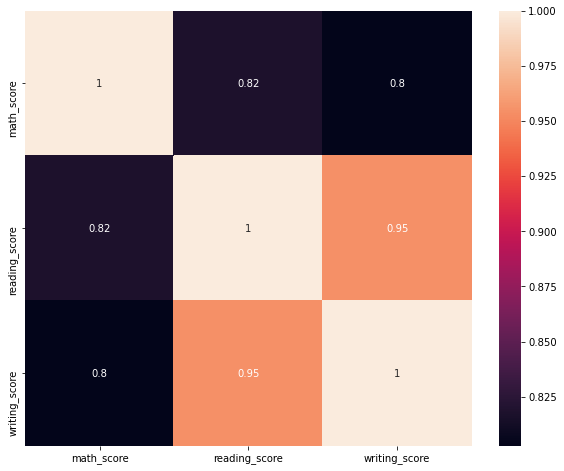

In [98]:
fig, axes = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr, annot=True)

## Prueba de hipótesis

La prueba de hipótesis, también conocida como prueba de significación, consiste en juzgar si existe una diferencia entre el tamaño de la muestra y el parámetro general (si la diferencia es significativa). Es decir, hacemos ciertas suposiciones sobre los parámetros generales y luego usamos los datos de muestra recopilados para verificar si las suposiciones (parámetros generales) que hicimos antes son razonables. En la prueba de hipótesis, estableceremos dos hipótesis completamente opuestas, a saber:

- Hipótesis nula
- Hipótesis alternativa

Luego, al juzgar la información de la muestra, elija aceptar la hipótesis nula o rechazar la hipótesis nula.

*Nota: el test de hipotesis sirve para comprobar si una muestra se comporta igual a una población*

### Pasos para generar una prueba de hipótesis:


1. Establecer la hipótesis nula y la hipótesis alternativa (Ho, historico, Ha, expiremental)
2. Establezca el nivel de significancia α (generalmente elija 0.05)
3. Elija diferentes métodos de prueba de hipótesis según el problema
4. Calcular estadísticas y obtener el valor P (El valor P representa la probabilidad de apoyar la hipótesis nula,Si P <0.05)
5. De acuerdo con los valores de P y α, juzgue.

**El fin es corroborar en base a una muestra si Ho se acepta o rechaza.**

### Ejemplo 1: (a mano)

La duración de las bombillas de 100 watt que fabrica una empresa sigue una distribución normal con una desviación de 120 horas. Su vida media está garantizada durante un mínimo de 800 horas. Se escoge al azar una muestra de 50 bombillas de un lote y, después de comprobarlas, se obtiene una vida media de 750 horas.

- a) Con un nivel de significación de 0,01, ¿habría que rechazar el lote por no cumplir la garantía?

0. Que datos tenemos?
- des_pob = 120
- med_pob = 800
- n = 50
- med_mue = 750

1. Establecemos nuestras hipótesis

- Ho: u >= 800
- Ha: u < 800

**OJO: Que tipo de hipótesis elegimos?**

![image info](./img/colas2.jpeg)

2. Establecemos nuestro nivel de significancia
- alpha = 0.01
- Nivel de confianza es 99%

**OJO Nivel de significancia más utilizados**

![image info](./img/alpha.png)

*Nota: Nivel de confianza, es la probabilidad de aceptar una Ho. Nivel de significancia esla probabilidad de rechazar una Ho*

3. Elegir metodo de prueba

- tenemos desviación estandar poblacional
- media poblacional
- numero de casos
- media muestral
- nivel de significancia (nivel de confianza)

**Ojo: Que tipo de test utilizamos?**

![image info](./img/z_or_t.png)

4. Calcular estadístico



Para este caso podemos utilizar la distrubucion Z ya que tenemos explícitamente la desv_pob.

![image info](./img/z_form.png)

<center>Z = (med_mue - media_pob)/(des_pob/sqrt(n))</center>
<center>Z = (750 - 800)/(120/sqrt(50))</center>
<center>Z = - 2.95</center>
<center>p-valor = 0.0016</center>

Ademas sabemos que el Z crítico (Zc) es de **-2.33** (a un nivel de confianza del 99%). Este valor lo sabemos de antemano por tabla. Ojo, es negativo ya que la zona de rechazo es a la izquierda. 

![image info](./img/ejemplo_1.jpg)

5. Juzgamos:

Si el p valor es menor al nivel de significancia, en este caso 0.0016 < 0.05 (o si el Z calculado es menor al Z critico). Tenemos evidencia suficiente para rechaza Ho. Esto quiere decir que la muestra seleccionada no se comporta igual que la población.

### Ejemplo 2: (En Python)

Supongamos que tenemos que determinar si las niñas obtienen una puntuación media superior a 600 en el examen. Por lo tanto, recopilamos los datos de 10 niñas utilizando muestras aleatorias y registramos sus calificaciones. Finalmente, también establecemos nuestro valor ⍺ (nivel de significancia) en 0.05.

Los puntajes son los siguientes:

[587,602,627,610,619,622,605,608,596,592]

0. Que tenemos?

- med_pob = 600
- n = 10
- nivel_sig = 0.05 / 95% de confianza
- med_mue = a calcular

1. Establecemos nuestra hipotesis:

- Ho: u > 600
- Ha: u =< 600

Al ver nuestra hipótesis, sabemos que se refiere a una prueba unilateral hacia la izq (ver signo de la desigualdad en Ha)

2. Establecemos nuestro nivel de significancia
- alpha: 0.05 / confianza del 95% de aceptar Ho
- Esto quiere decir que el Z_alpha (Z_critico) es = -1.64 (tabla)

3. Elegimos método o test de prueba:

- tenemos media poblacional
- tenemos numero de casos
- tenemos media muestral
- nivel de significancia (nivel de confianza)
- **no tenemos la desviación estandard muestral**

Para esto usaremos la prueba t-Student

![image.png](./img/t_form.png)

4. Calculo de estadístico

In [3]:
# Importamos librerias
import numpy as np
from scipy import stats
from statsmodels.stats import weightstats as stests

In [4]:
# generamos nuestra lista con elemento y calculamos la media
score_w = [587,602,627,610,619,622,605,608,596,592]
print('Cantiada de elementos: ', len(score_w))
print('La media de la muestra es: ', np.mean(score_w))
print('La desv std de la muestra es: ', np.std(score_w))

Cantiada de elementos:  10
La media de la muestra es:  606.8
La desv std de la muestra es:  12.464349160706305


In [5]:
# Generamos nuestra prueba T
ttest, pvalue = stats.ttest_1samp(score_w, 600, alternative='less')
print('el p valor es: ', round(pvalue, 5))
print('el valor t es: ', round(ttest, 5))

el p valor es:  0.93194
el valor t es:  1.63667


5. Juzgamos

In [6]:
if pvalue<0.05:
    print("Rechazamos hipotesis nula")
else:
    print("Aceptamos hipotesis nula")

Aceptamos hipotesis nula


Por los valores obtenidos tenemos evidencia para rechazar la hipótesis alternativa. 

### Ejercicio 1: (Python)

Digamos que queremos determinar si, en promedio, los niños obtienen 15 puntos más que las niñas en el examen. No tenemos la información relacionada con la varianza (o desviación estándar) para las puntuaciones de las niñas o de los niños. Recopilamos aleatoriamente los datos de 10 niñas y niños con sus calificaciones. Elegimos que nuestro valor ⍺ (nivel de significancia) sea 0.05 como criterio para la Prueba de Hipótesis.

- notas_niñas = utilizar la info del ejemplo anterior.
- notas_niños = [626,643,647,634,630,649,625,623,617,607]

Resolver juntos

0. Que tenemos?
1. Generar hipotesis
2. Establecer nivel de significancia
3. Elegir método de prueba
4. Calcular estadísticos
5. Juzgar

In [9]:
score_w
score_m = [626,643,647,634,630,649,625,623,617,607]
print(np.mean(score_m))

630.1


In [266]:
len(score_w)

10

In [267]:
len(score_m)

10

Ho: Uh-Um = 15

H1: Uh-Um != 15

uh != uw

In [14]:
ttest, pv = stats.ttest_ind()

In [273]:
print(ttest)
print(pv)

-3.921956260567739
0.9994999574288214


In [271]:
if pv<0.05:
    print("Rechazamos hipotesis nula")
else:
    print("Aceptamos hipotesis nula")

Aceptamos hipotesis nula


### Ejercicio 2: (Python)

Estudio de caso: prueba de hipótesis para el coronavirus

Este conjunto de datos se ha extraído del repositorio de John Hopkin y puede encontrar el enlace aquí.

Este conjunto de datos tiene las siguientes características:

- Provincia / Estado
- País / Región
- Última actualización
- Confirmado
- Fallecidos
- Recuperado
- Latitud
- Longitud

Se ha agregado la temperatura y humedad para latitud y longitud utilizando la API meteorológica de Python: Pyweatherbit. Una percepción común sobre COVID-19 es que el clima cálido es más resistente al brote de corona y debemos verificar esto mediante pruebas de hipótesis. Entonces, ¿cuál será nuestra hipótesis nula y alternativa?

- Hipótesis nula: la temperatura no afecta el brote de COV-19
- Hipótesis alternativa: la temperatura sí afecta el brote de COV-19

*Nota: Estamos considerando la temperatura por debajo de 24 como clima frío y por encima de 24 como clima cálido en nuestro conjunto de datos.*

Mas info sobre Prueba de hipótesis: https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce